# Project: Investigate a Dataset  - (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Overview
> Patient physician appointment no-shows are a prevalent problem in health care services leading to inefficient resources and poor continuity of care.

> This analysis explores data provided on scheduled appointments from a Brazilian public primary care setting.(1)

> Questions we might propose:
1. Are there differences between males and females or differences in patient age when it comes to doctor appointments?
2. Are some patients more likely to be no shows (Age, comorbidity, neighborhood of appointment...)?
3. Is there a combination of features that makes a patient more likely to no show (i.e., Age plus comorbidity)?

In [1]:
# Import statements for the packages we plan to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignoring output warnings 
import warnings; warnings.simplefilter('ignore')

# Making sure output is inline with codeblocks.
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. We will document the cleaning steps and attempt to justify our cleaning decisions.

### General Properties

In [2]:
# Here we load our data and print out a few lines to see what we have.
# Data provided by Kaggle thanks to JoniHoppen (1).

schedule_data = pd.read_csv('KaggleV2-May-2016.csv')

# View of a few rows of our data to verify that it was properly loaded
schedule_data.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Info allows us to see the structure of the data, column names, data types, and counts.
schedule_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Initial thoughts on the data file

Info shows that we have 14 columns. No null values present. Patient ID is float64, but should be an Interger value... No-show is our key value. There are some column spelling/language naming conventions to adjust.

In [4]:
# Basic statistics of the features in the data set.
schedule_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
# Not all columns are calculated due to format. A look at Gender, Neighbourhood, and noshow colums.
schedule_data.describe(include=['object', 'bool'])

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,No-show
count,110527,110527,110527,110527,110527
unique,2,103549,27,81,2
top,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,JARDIM CAMBURI,No
freq,71840,24,4692,7717,88208


In [6]:
# Looking at which features have unique data entries.
schedule_data.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

### Obsevations from the data set

PatientID information is not unique. It will be interesting to see information behind repeat appointments.
There are over 100 unique ages, which needs further investigation.
Neighborhood data is "where" the appointments took place based on the Kaggle  description (1).
Handicap indicates number of handicaps a patient might have (1).

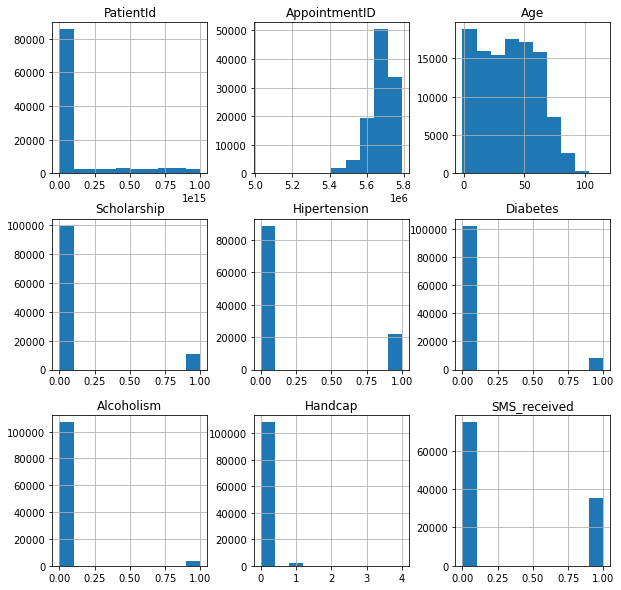

In [7]:
# Histogram counts of the data set features
schedule_data.hist(figsize=(10,10));

### Data Cleaning

### Brief recall of what we have found so far...
Variables used in dataset:
    PatientID - unique patient identification  
    AppointmentID - unique appointment identification  
    Age - Age of the patient  
    Gender - Male or Female  
    ScheduledDay - Day appointment was arranged  
    AppointmentDay - Day of actual appointment  
    Neighborhood - Where the appointment was to take place  
    Scholarship - Designation for Bolsa Familia, the social welfare program in Brazil  
    Hypertension - Elevated blood pressure True or False  
    Diabetes - Elevated blood sugar True or False  
    Alcoholism - Alcohol dependency of patient True or False  
    Handicap - Determinating number of handicaps the patient has  
    SMS_received - If text message was sent to the patient  
    No-show - If the patient was a no-show True or False  
    
Appointments in data set: 110,527 entries 14 associated variables  
Most important variable is the outcome of "no-show."  

### Data cleaning considerations:  
    There are some language/spelling differences Hipertension vs Hypertension, Hancap vs Handicap  
    PatientID is too truncated to read  
    Appointment Date timestamps should be converted to be more useful for computations  
    It's not clear if Age data inputs are an issue, which ranges from -1 to 115 years of age.  

### 1. Clean up column names

In [8]:
# Addressing Column Names to be something more useful for charts.
schedule_data.rename(columns = {'Hipertension':'Hypertension',
                         'Handcap': 'Handicap',
                          'Neighbourhood': 'Neighborhood',      
                          'No-show': 'noshow'}, inplace = True)
# Updated column names
print(schedule_data.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighborhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'noshow'],
      dtype='object')


### 2. Creating a column to store hour of the day appointment was scheduled.

In [9]:
# Saving time from ScheduledDay for possible later use.
schedule_data.insert(loc = 5, 
          column = 'Sched_Hour', 
          value = schedule_data['ScheduledDay'])

# Making sure format is just the hour as a number
schedule_data['Sched_Hour'] = pd.to_datetime(schedule_data['Sched_Hour']).dt.hour

# Verifying column creation
schedule_data.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Sched_Hour,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,noshow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,18,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,16,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,16,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,17,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,16,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### 3. Changing ScheduledDay and Appointment into useful format.

In [10]:
# Converting ScheduledDay and AppointmentDay into a useful format.
# Droping ScheduledDay hours and minutes since
# the AppointmentDay times are all set to zero.

schedule_data['ScheduledDay'] = pd.to_datetime(schedule_data['ScheduledDay']).dt.date.astype('datetime64[ns]')
schedule_data['AppointmentDay'] = pd.to_datetime(schedule_data['AppointmentDay']).dt.date.astype('datetime64[ns]')

#Changing PatientId to longer format to make it readable
schedule_data['PatientId'] = schedule_data['PatientId'].astype('int64')

# Verrifying that updated columns with date format
schedule_data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Sched_Hour,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,noshow
0,29872499824296,5642903,F,2016-04-29,2016-04-29,18,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,16,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,16,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,17,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,16,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03,2016-06-07,9,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735,5650093,F,2016-05-03,2016-06-07,7,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893,5630692,F,2016-04-27,2016-06-07,16,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557,5630323,F,2016-04-27,2016-06-07,15,38,MARIA ORTIZ,0,0,0,0,0,1,No


### 4. Creating column calculating the lag between when the Appointment was made.

In [11]:
# Using ScheduledDay and AppointmentDay to calculate how many days pass between scheduling and the actual appointment.
schedule_data.insert(loc = 6, 
          column = 'Sched_Interval', 
          value = (schedule_data['AppointmentDay'] - schedule_data['ScheduledDay']))

# Cleaning the formating to only show the integer number.
schedule_data['Sched_Interval'] = schedule_data['Sched_Interval'].astype('timedelta64[D]')

# Verifying the updated data set with schedule interval
schedule_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Sched_Hour,Sched_Interval,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,noshow
0,29872499824296,5642903,F,2016-04-29,2016-04-29,18,0.0,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,16,0.0,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,16,0.0,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,17,0.0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,16,0.0,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### 5. Creating column to track which day of the week the Appointment is scheduled for.

In [12]:
# Extracting scheduled Day of the week for analysis
schedule_data.insert(loc = 7, 
          column = 'Day_of_Week', 
          value = 0 )

# Formating for Appointment day of the week to be an integer for analysis
schedule_data['Day_of_Week'] = schedule_data['AppointmentDay'].dt.dayofweek

# Verifying the updated data set with Day of the Week
schedule_data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Sched_Hour,Sched_Interval,Day_of_Week,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,noshow
0,29872499824296,5642903,F,2016-04-29,2016-04-29,18,0.0,4,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,16,0.0,4,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,16,0.0,4,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,17,0.0,4,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,16,0.0,4,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03,2016-06-07,9,35.0,1,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735,5650093,F,2016-05-03,2016-06-07,7,35.0,1,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893,5630692,F,2016-04-27,2016-06-07,16,41.0,1,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557,5630323,F,2016-04-27,2016-06-07,15,41.0,1,38,MARIA ORTIZ,0,0,0,0,0,1,No


### 6. Sample of patients with multiple appointments.

In [13]:
# Some patients do have repeat visits based on the unique PatientID and AppointmentID information. 
schedule_data[(schedule_data.PatientId == 7839272661752)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Sched_Hour,Sched_Interval,Day_of_Week,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,noshow
3370,7839272661752,5730318,M,2016-05-24,2016-05-24,8,0.0,1,38,RESISTÊNCIA,0,0,0,0,1,0,No
27033,7839272661752,5679978,M,2016-05-10,2016-05-09,10,-1.0,0,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
100002,7839272661752,5787285,M,2016-06-08,2016-06-08,9,0.0,2,38,RESISTÊNCIA,0,0,0,0,1,0,No
100003,7839272661752,5752857,M,2016-05-31,2016-06-01,12,1.0,2,38,RESISTÊNCIA,0,0,0,0,1,0,No
101919,7839272661752,5777702,M,2016-06-06,2016-06-06,14,0.0,0,38,RESISTÊNCIA,0,0,0,0,1,0,No


#### Comment on patients with multiple appointments:

Each appointment has a unique ID, however, there isn't enough information to determine if subequent appointments
are directly related to a previous missed appointment. So, we will not do follow up analsysis here.

### 7. Examining the patient recorded Age information

In [14]:
# Examining the age range of the data set.
outlyers = [schedule_data[schedule_data['Age'] == -1 ], schedule_data[schedule_data['Age'] == 115 ]]
result = pd.concat(outlyers)
result

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Sched_Hour,Sched_Interval,Day_of_Week,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,noshow
99832,465943158731293,5775010,F,2016-06-06,2016-06-06,8,0.0,0,-1,ROMÃO,0,0,0,0,0,0,No
63912,31963211613981,5700278,F,2016-05-16,2016-05-19,9,3.0,3,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,31963211613981,5700279,F,2016-05-16,2016-05-19,9,3.0,3,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,31963211613981,5562812,F,2016-04-08,2016-05-16,14,38.0,0,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,31963211613981,5744037,F,2016-05-30,2016-05-30,9,0.0,0,115,ANDORINHAS,0,0,0,0,1,0,No
97666,748234579244724,5717451,F,2016-05-19,2016-06-03,7,15.0,4,115,SÃO JOSÉ,0,1,0,0,0,1,No


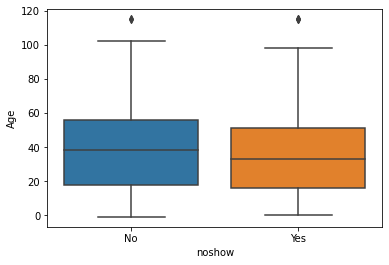

In [15]:
# Boxplot showing age range
sns.boxplot(x='noshow',y='Age',data=schedule_data)
plt.show()

#### Comment on age range:

The age range in the data set includes -1 and 115. These outliers are small, so we'll drop them.

In [16]:
# Since the age outliers are a small number of entries, these will be dropped from the data analysis
final_schedule_data = schedule_data[(schedule_data['Age'] > 0) & (schedule_data['Age'] < 115)]

# Verifying the final Age range included in data set.
final_schedule_data.describe()

,PatientId,AppointmentID,Sched_Hour,Sched_Interval,Day_of_Week,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.069820e+05,1.069820e+05,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000,106982.000000
mean,1.472801e+14,5.675434e+06,10.772205,10.166645,1.860434,38.312501,0.101036,0.203773,0.074246,0.031407,0.022938,0.323269
std,2.558251e+14,7.133307e+04,3.226077,15.263557,1.371441,22.460622,0.301377,0.402804,0.262172,0.174416,0.164010,0.467727
min,3.921700e+04,5.030230e+06,6.000000,-6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173028e+12,5.640489e+06,8.000000,0.000000,1.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.171698e+13,5.680742e+06,10.000000,4.000000,2.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433627e+13,5.725635e+06,13.000000,14.000000,3.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,21.000000,179.000000,5.000000,102.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


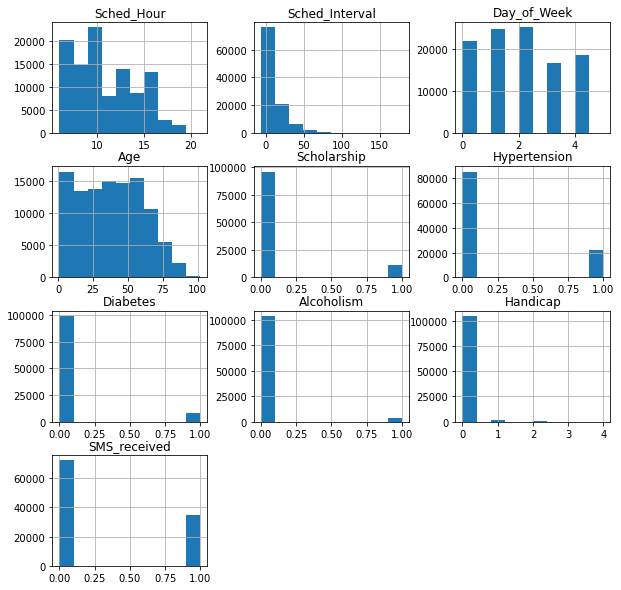

In [17]:
# Updated graph grid of histograms showing bucketed counts for each feature/variable.
FinalHist = final_schedule_data.iloc[:,2:]
FinalHist.hist(figsize=(10,10));


#### Key results after data conversion:
Average Age = 38.3  
Scholarship = 10.1%  
Hypertension = 20.4%  
Diabetes = 7.4%  
Alcoholism = 3.1%  
Handicap = 2.3%  
Received Text Messages 32.3%  
No Shows = 20.3%  
Mean Appointment Wait = 10 days  

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Are there differences between males and females or patient age when it comes to doctor appointments?)

In [18]:
# For this part of the analysis, we'll use a subset of the data colums, excluding PatientID and AppointmentID
patient_features = ['Gender', 'ScheduledDay',
       'AppointmentDay', 'Sched_Hour', 'Sched_Interval', 'Day_of_Week', 'Age',
       'Neighborhood', 'Scholarship', 'Hypertension', 'Diabetes',
       'Alcoholism', 'Handicap', 'SMS_received']

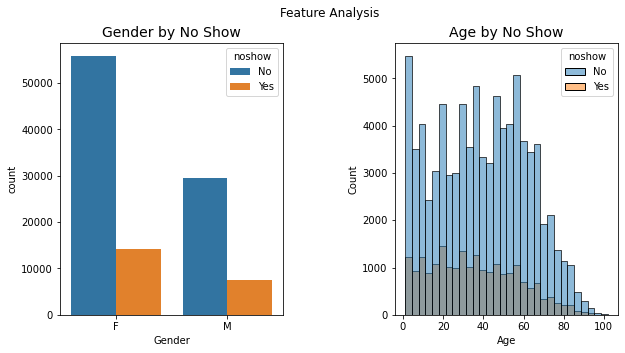

In [19]:
# No show data across Gender and Age
fig = plt.figure(figsize=(10,5))
fig.suptitle('Feature Analysis', fontsize=12)
fig.subplots_adjust(wspace=.5)
# Subplot 1
plt.subplot(121)
plt.title('Gender by No Show', fontsize=14)
sns.countplot(x=final_schedule_data['Gender'], hue=final_schedule_data.noshow)

# Subplot 2
plt.subplot(122)
plt.title('Age by No Show', fontsize=14)
sns.histplot(x=final_schedule_data['Age'], bins=30, hue=final_schedule_data.noshow)

plt.show()    

#### Comment on Gender:

Gender splits are close to averages for no shows.
No shows by age are slightly higher for the younger age groups and improve as patient recorded ages increase.

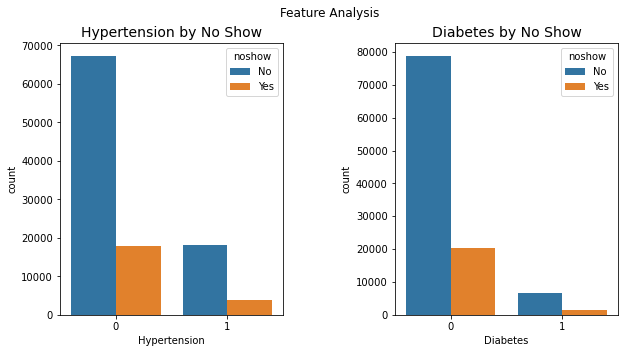

In [20]:
# No show data across Hypertension and Diabetes
fig = plt.figure(figsize=(10,5))
fig.suptitle('Feature Analysis', fontsize=12)
fig.subplots_adjust(wspace=.5)
# Subplot 1
plt.subplot(121)
plt.title('Hypertension by No Show', fontsize=14)
sns.countplot(x=final_schedule_data['Hypertension'], hue=final_schedule_data.noshow)

# Subplot 2
plt.subplot(122)
plt.title('Diabetes by No Show', fontsize=14)
sns.countplot(x=final_schedule_data['Diabetes'], hue=final_schedule_data.noshow)

plt.show()  

#### Hypertension and Diabetes no shows are close to averages.

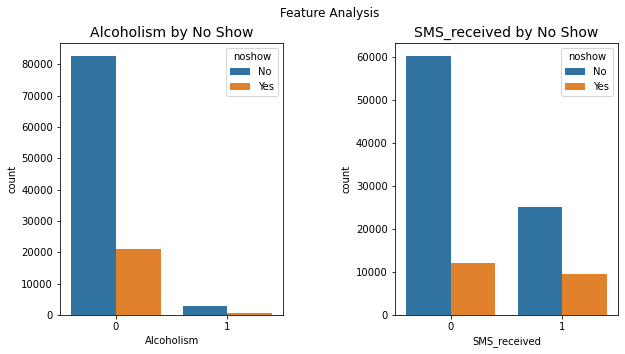

In [21]:
# No show data across Alcoholism and SMS_received
fig = plt.figure(figsize=(10,5))
fig.suptitle('Feature Analysis', fontsize=12)
fig.subplots_adjust(wspace=.5)
# Subplot 1
plt.subplot(121)
plt.title('Alcoholism by No Show', fontsize=14)
sns.countplot(x=final_schedule_data['Alcoholism'], hue=final_schedule_data.noshow)

# Subplot 2
plt.subplot(122)
plt.title('SMS_received by No Show', fontsize=14)
sns.countplot(x=final_schedule_data['SMS_received'], hue=final_schedule_data.noshow)

plt.show()  

#### Alcoholism no shows follow averages. However, patients that don't receive a SMS text messages
#### have a slightly higher percentage of no shows.

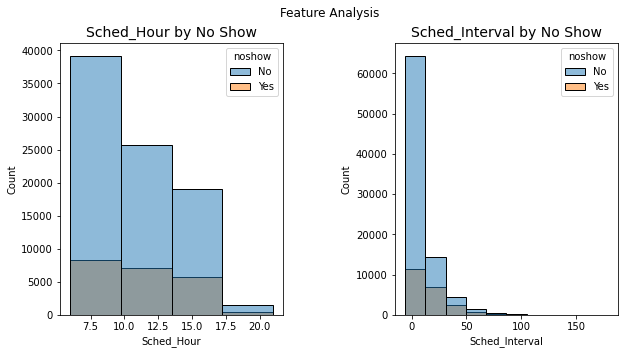

In [22]:
# No show data across Scheduled Hour and Interval between scheduling the appointment and the actual appointment.
fig = plt.figure(figsize=(10,5))
fig.suptitle('Feature Analysis', fontsize=12)
fig.subplots_adjust(wspace=.5)
# Subplot 1
plt.subplot(121)
plt.title('Sched_Hour by No Show', fontsize=14)
sns.histplot(x=final_schedule_data['Sched_Hour'], bins= 4, hue=final_schedule_data.noshow)

# Subplot 2
plt.subplot(122)
plt.title('Sched_Interval by No Show', fontsize=14)
sns.histplot(x=final_schedule_data['Sched_Interval'], bins= 10, hue=final_schedule_data.noshow)

plt.show()  

#### Scheduled Hour is the hour when the appointment was set by the patient. The hours are following trend.
#### Interval between the scheduling and the appointment no shows increases as the lag becomes larger.

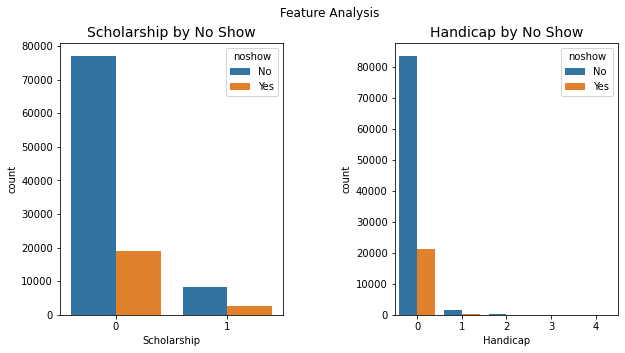

In [23]:
# No show across Scholarship (govt. benefit) and Handicap status.
fig = plt.figure(figsize=(10,5))
fig.suptitle('Feature Analysis', fontsize=12)
fig.subplots_adjust(wspace=.5)
# Subplot 1
plt.subplot(121)
plt.title('Scholarship by No Show', fontsize=14)
sns.countplot(x=final_schedule_data['Scholarship'], hue=final_schedule_data.noshow)

# Subplot 2
plt.subplot(122)
plt.title('Handicap by No Show', fontsize=14)
sns.countplot(x=final_schedule_data['Handicap'], hue=final_schedule_data.noshow)

plt.show()  

#### Patients on government benefit show similar averages for no shows.
#### The data for multiple handicaps is small in the research, but averages
#### for no shows increase at the 3rd and 4th handicap.

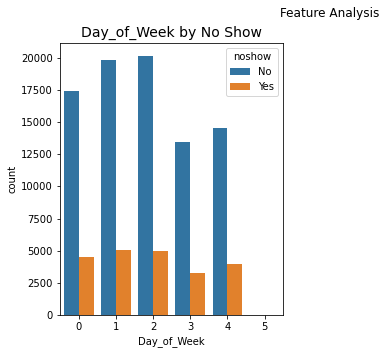

In [33]:
# No show data across appointment day of the week and neighbourhood location of the appointment.
fig = plt.figure(figsize=(10,5))
fig.suptitle('Feature Analysis', fontsize=12)
fig.subplots_adjust(wspace=.5)
# Subplot 1
plt.subplot(121)
plt.title('Day_of_Week by No Show', fontsize=14)
sns.countplot(x=final_schedule_data['Day_of_Week'], hue=final_schedule_data.noshow)

plt.show()  

#### Day of the week no shows are close to averages day Sunday (0) through day Thursday (4). It increases slightly
#### on Friday (5), but the volume of appointments on Friday are very small.
#### See below for Neighbourood analysis....

# Patient Record Conculsions:

### On average, 20% of the patient appointments are considered to be no shows. 
### Now we want to look at which features might display a higher or lower potential to be a no show.

### Research Question 2  (Which patients are more likely to be no shows (Age, comorbidity, neighborood of appointment...)?)

### 1. Graphical look of patient by appointment location.

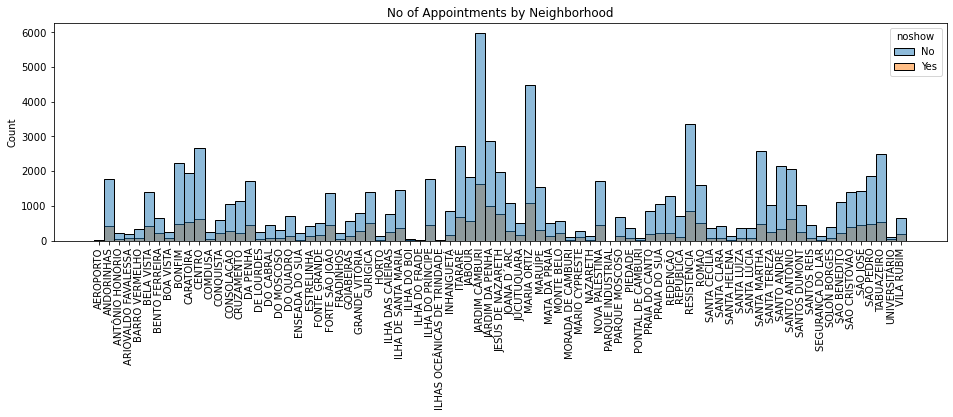

In [34]:
# No show data by neighborhood.
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.histplot(x=np.sort(final_schedule_data.Neighborhood),hue=final_schedule_data.noshow)
ax.set_title("No of Appointments by Neighborhood")
plt.show()

#### There doesn't appear to be any noticable difference between neighbourhoods.

### 2. To better understand the features data, we'll calculate the raw percentages.

In [35]:
# Function to calculate the percentages, rounded and with % sign
def feature_prop (dataset,feature):
    df = final_schedule_data[["AppointmentID",feature,"noshow"]]
    df.insert(loc = 3, 
              column = 'Count', 
              value = 1 )
    df_count = df.groupby([feature, "noshow"]).agg({"Count" : "sum"})
    df_pcts = df_count.groupby(level=0).apply(lambda x:100 * x / x.sum())
    df_pcts['Count'] = df_pcts['Count'].round(1).astype(str) + '%'
    return df_pcts

In [36]:
# List of colums to be analyzed for no show percentages.
split_features=['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMS_received',
               'Handicap', 'Sched_Hour', 'Day_of_Week']

# Value inspection of the columns. Iterating through the concerning columns.
for c in split_features:
    print(feature_prop(final_schedule_data, c),'\n')

                    Count
Scholarship noshow       
0           No      80.1%
            Yes     19.9%
1           No      76.2%
            Yes     23.8% 

                     Count
Hypertension noshow       
0            No      79.0%
             Yes     21.0%
1            No      82.7%
             Yes     17.3% 

                 Count
Diabetes noshow       
0        No      79.6%
         Yes     20.4%
1        No      82.0%
         Yes     18.0% 

                   Count
Alcoholism noshow       
0          No      79.7%
           Yes     20.3%
1          No      79.9%
           Yes     20.1% 

                     Count
SMS_received noshow       
0            No      83.3%
             Yes     16.7%
1            No      72.3%
             Yes     27.7% 

                 Count
Handicap noshow       
0        No      79.7%
         Yes     20.3%
1        No      82.2%
         Yes     17.8%
2        No      79.8%
         Yes     20.2%
3        No      76.9%
         Yes   

In [37]:
### There appears very little difference between 'Hypertension', 'Diabetes', and 'Alcoholism' patients.
### Patients on goverment programs "Scholarship" had a slightly higher no show of 23.8%
### Patients that didn't receive an SMS reminder text had a higher than average no show rate of 27.7%.
### Number of handicaps was near average until patients had 3 or 4 handicaps.
### Patients that book their appointments late in the date tend to have a higher than average no show rate.
### Day of the week no show was near average until day "5" or Friday.

#### 3. A closer look at Age and Day of the Week and appointment scheduling lag by looking at the probability of a no show

In [38]:
# Calculation function for probability
def prob_calc(dataset, feature):
    
    df = pd.crosstab(index=dataset[feature], columns=dataset.noshow).reset_index()
    df['prob_calc'] = df['Yes'] / (df['No'] + df['Yes'])
    return df[[feature, 'prob_calc']]

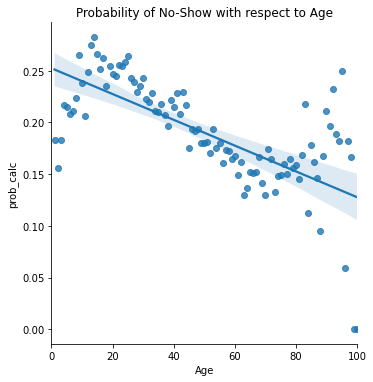

In [39]:
# Graphical look of probability of no show based on Age
noshow_prop = prob_calc(final_schedule_data,'Age')
ageplot = sns.lmplot(data = noshow_prop, x='Age', y='prob_calc', fit_reg=True)
ageplot.set(xlim=(0, 100), title='Probability of No-Show with respect to Age')

#### It appears that the probability of making the appointment increases with the patient's Age.

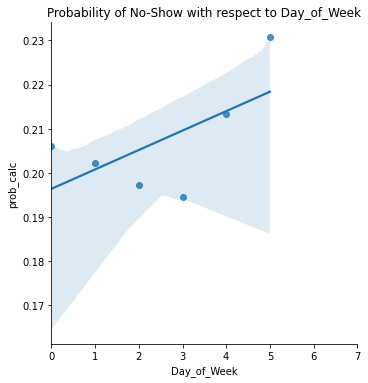

In [40]:
# Graphical look of probability of no show based on Day of the week for the appointment
noshow_prop = prob_calc(final_schedule_data,'Day_of_Week')
ageplot = sns.lmplot(data = noshow_prop, x='Day_of_Week', y='prob_calc', fit_reg=True)
ageplot.set(xlim=(0, 7), title='Probability of No-Show with respect to Day_of_Week')

#### It appears that the probability of making the appointment increases with the patient's Age.

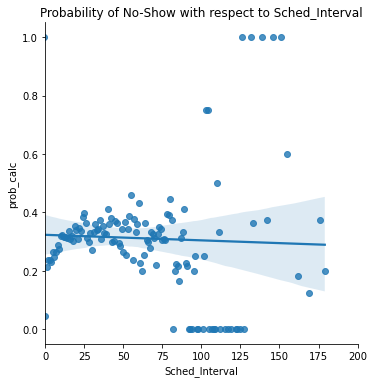

In [41]:
# Graphical look at the probability of a no show based on lag between scheduling and the actual appointment day
noshow_prop = prob_calc(final_schedule_data,'Sched_Interval')
ageplot = sns.lmplot(data = noshow_prop, x='Sched_Interval', y='prob_calc', fit_reg=True)
ageplot.set(xlim=(0, 200), title='Probability of No-Show with respect to Sched_Interval')

#### It's difficult to interpret the lag probability, but it appears that it diverges the further
#### time is between the day the appointment is scheduled and the actual appointment.

### Research Question 2  (Is there a combination of features that makes a patient more likely to no show (i.e., Age plus comorbidity)?)

#### 1. To look at the combinations of features, we will convert the "M/F" and "No/Yes" fetures to 0 and 1. Then
#### look at the correlations between features.

In [42]:
# Creating a subset of the data so we drop PatientID and AppointmentID
df_corr = final_schedule_data[['Gender',
       'Sched_Hour', 'Sched_Interval', 'Day_of_Week', 'Age',
       'Neighborhood', 'Scholarship', 'Hypertension', 'Diabetes',
       'Alcoholism', 'Handicap', 'SMS_received', 'noshow']]

# Verification of data subset
df_corr.head()

,Gender,Sched_Hour,Sched_Interval,Day_of_Week,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,noshow
0,F,18,0.0,4,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,16,0.0,4,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,16,0.0,4,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,17,0.0,4,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,16,0.0,4,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [43]:
# Here we convert the Gender "M/F" and Noshow "Yes/No" information to be 0 or 1 for calculation purposes

# Gender
df_corr['Gender'] = df_corr['Gender'].map({'F': 0, 'M': 1})

# Noshow
df_corr['noshow'] = df_corr['noshow'].map({'No': 0, 'Yes': 1})

# Verification of data subset
df_corr.head()

,Gender,Sched_Hour,Sched_Interval,Day_of_Week,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,noshow
0,0,18,0.0,4,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,1,16,0.0,4,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,0,16,0.0,4,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,0,17,0.0,4,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,0,16,0.0,4,56,JARDIM DA PENHA,0,1,1,0,0,0,0


#### 2. With our data subset, we can use a correlation map to see how the individual variables relate with the other variables

<AxesSubplot:>

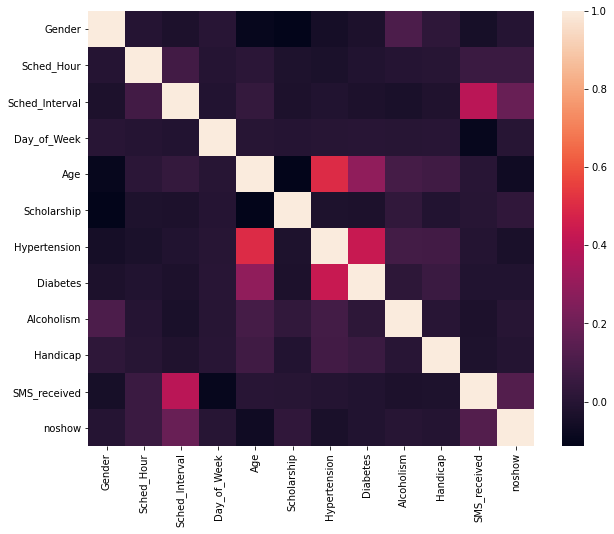

In [45]:
# Creation of the correlation map using the feature data
f,ax = plt.subplots(figsize=(10, 8))
corr = df_corr.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [47]:
# Table of correlation numbers
corr

,Gender,Sched_Hour,Sched_Interval,Day_of_Week,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,noshow
Gender,1.000000,-0.000960,-0.030502,0.004183,-0.094019,-0.113692,-0.051314,-0.030037,0.110405,0.025098,-0.045862,-0.003205
Sched_Hour,-0.000960,1.000000,0.080999,-0.003167,0.016306,-0.024427,-0.033413,-0.014418,-0.002618,0.002809,0.057829,0.058885
Sched_Interval,-0.030502,0.080999,1.000000,-0.013163,0.038874,-0.030438,-0.017002,-0.027338,-0.038949,-0.019999,0.396494,0.185700
Day_of_Week,0.004183,-0.003167,-0.013163,1.000000,0.000532,-0.000779,0.002682,0.006280,0.002460,0.004259,-0.092654,0.002075
Age,-0.094019,0.016306,0.038874,0.000532,1.000000,-0.112677,0.502241,0.290756,0.090444,0.073387,0.005295,-0.067205
Scholarship,-0.113692,-0.024427,-0.030438,-0.000779,-0.112677,1.000000,-0.024530,-0.027627,0.033524,-0.009823,-0.000014,0.029387
Hypertension,-0.051314,-0.033413,-0.017002,0.002682,0.502241,-0.024530,1.000000,0.430837,0.085461,0.078378,-0.008845,-0.037248
Diabetes,-0.030037,-0.014418,-0.027338,0.006280,0.290756,-0.027627,0.430837,1.000000,0.016871,0.056478,-0.016140,-0.015916
Alcoholism,0.110405,-0.002618,-0.038949,0.002460,0.090444,0.033524,0.085461,0.016871,1.000000,0.003897,-0.027406,-0.000508
Handicap,0.025098,0.002809,-0.019999,0.004259,0.073387,-0.009823,0.078378,0.056478,0.003897,1.000000,-0.025016,-0.006698


#### Based on correlation the map:
#### There is some correlation between Scheduled Interval and Text reminder,
#### between Age and Hypertension, and between Age and Diabetes.
#### There is also correlation between Hypertension and Diabetes together.
#### There is some corrrelation between Scheduling Internval and noshow, and SMS Received and noshow.
#### The remaining features appear to have minimal correlation bettween each other. 

<a id='conclusions'></a>
## Conclusions

Final observation: Analysis of the data set shows that patients are more
likely to make their appointments as the age of the patient increases. They
are more likely to show to an appointment if they receive a text message reminder.
As the number of handicaps increases, patients are more likely to be a "no show"
to an appointment. Also, a longer time interval between scheduling an appointment
and the actual appointment date increases the chances of a patient being a "no show"
for an appointment. Having a comorbidity (hypertension, alcoholism, diabetes, etc.)
doesn't appear to have a higher than average impact on "no show" appointments.

Further analysis might look at predictive value of the data set for machine
learning model. Also, is there any correlation between having multiple comorbidities
like combined diabetes and hypertension.

Limitations To Analysis:

• Data did not include the appointment time of day, which would have been useful
  for the analysis.
• Collinearity and relationship between features was not explored.
• Data didn't look at levels of the comorbidity or if the comorbidity was well
  managed or not.
• Thus, the data lacks precision as a model for the feature coefficients.
    - As an example Hypertension is just "yes" or "no" not level of the blood
      pressure or if under control.

Suggestions for future analysis might include:
    - Level of diabetes and if under control.
    - How far a patient had to travel to an appointment and if by car
      or by public transportation.
    - What stage of Alcoholism the patient might be experiencing.
    - Hypertension level information and if under control or not.
    - Deeper analysis of the SMS Text Messaging. It wasn't clear if all
      patients had access or not.
    - Are there any socioeconomic limitations keeping patients from
      making their appointments.
    
The data does contain useful information regarding potential no show patients.
However, current findings should only be used as a starting place for further
analysis and should not be interpreted as a predictive model.

Credits:  
    Udacity : Udacity.com  
    www.analyticsvidhya.com  
    Kaggle data for medical no-shows: (1) https://www.kaggle.com/joniarroba/noshowappointments  